In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("C:\\Users\\utkar\\Downloads\\IMDB Dataset.csv")

In [3]:
dfdata = df.iloc[:10000]

In [4]:
dfdata

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [5]:
dfdata["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
dfdata.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
dfdata.tail()

,review,sentiment
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative
9999,Smashing film about film-making. Shows the int...,positive


In [8]:
dfdata.shape

(10000, 2)

In [9]:
dfdata.size

20000

In [10]:
dfdata.dtypes

review       object
sentiment    object
dtype: object

In [11]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [12]:
dfdata.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,False,False


In [13]:
dfdata.isnull().sum()

review       0
sentiment    0
dtype: int64

In [14]:
dfdata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [15]:
dfdata.duplicated().sum()

17

In [16]:
dfdata[dfdata.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


In [17]:
dfdata.duplicated().sum()

17

In [18]:
dfdata.drop_duplicates(inplace= True)

In [19]:
dfdata.duplicated().sum()

0

In [20]:
dfdata["sentiment"].value_counts()

positive    5023
negative    4960
Name: sentiment, dtype: int64

In [21]:
def No_of_Words(text):
    words = text.split()
    words_counts = len(words)
    return words_counts

In [22]:
dfdata["word count"] = dfdata["review"].apply(No_of_Words)

In [23]:
dfdata

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive,148
9996,Give me a break. How can anyone say that this ...,negative,218
9997,This movie is a bad movie. But after watching ...,negative,228
9998,This is a movie that was probably made to ente...,negative,136


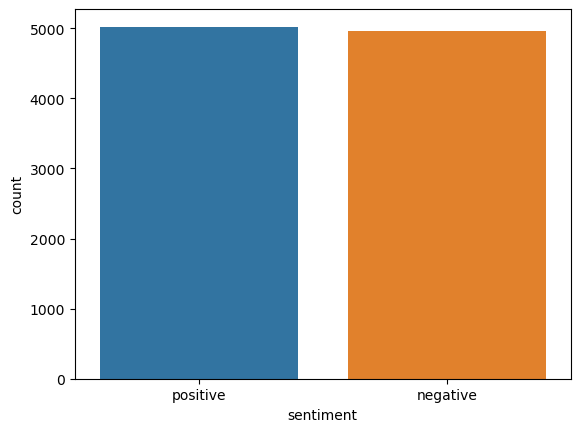

In [24]:
import seaborn as sns
sns.countplot(x = dfdata["sentiment"])
plt.show()

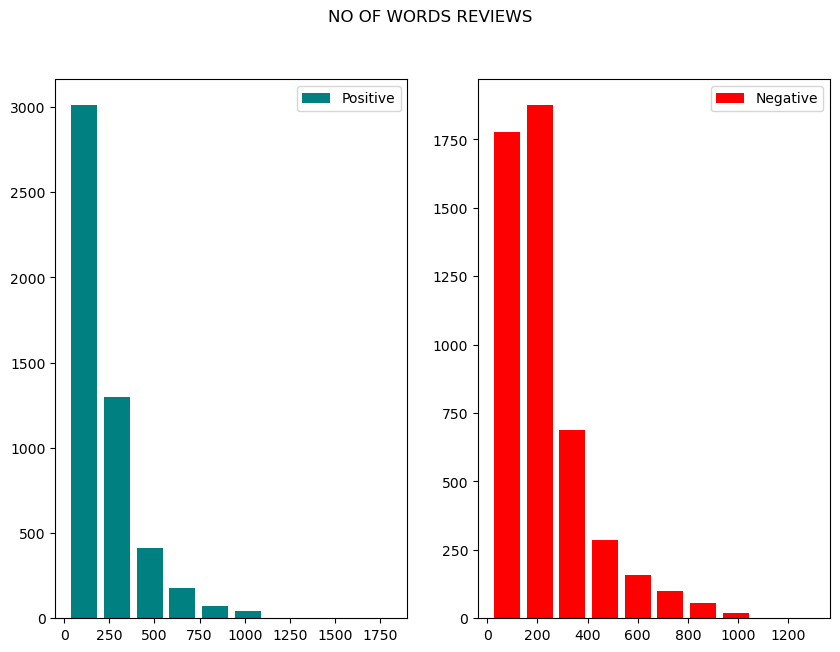

In [25]:
fig , ax = plt.subplots(1,2, figsize = (10,7))
ax[0].hist(dfdata[dfdata["sentiment"]=="positive"]["word count"], label = "Positive", color = "teal", rwidth= 0.8);
ax[0].legend(loc = "upper right");
ax[1].hist(dfdata[dfdata["sentiment"]=="negative"]["word count"], label = "Negative", color = "red", rwidth= 0.8);
ax[1].legend(loc = "upper right");
plt.suptitle("NO OF WORDS REVIEWS")
plt.show()

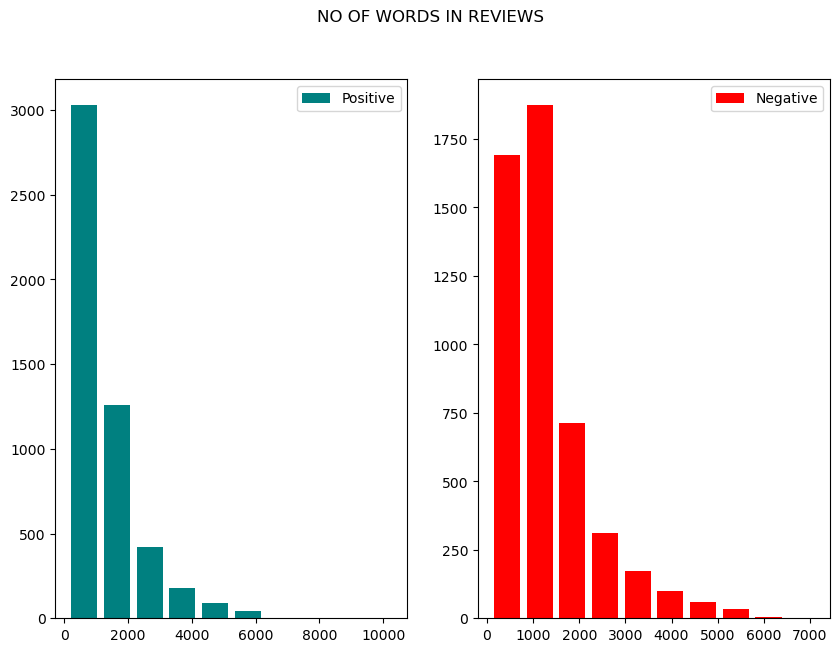

In [26]:
fig , ax = plt.subplots(1,2, figsize = (10,7))
ax[0].hist(dfdata[dfdata["sentiment"]=="positive"]["review"].str.len(), label = "Positive", color = "teal", rwidth= 0.8);
ax[0].legend(loc = "upper right");
ax[1].hist(dfdata[dfdata["sentiment"]=="negative"]["review"].str.len(), label = "Negative", color = "red", rwidth= 0.8);
ax[1].legend(loc = "upper right");
plt.suptitle("NO OF WORDS IN REVIEWS")
plt.show()

In [27]:
dfdata.sentiment.replace("positive", 1, inplace= True)
dfdata.sentiment.replace("negative", 2, inplace = True)

In [28]:
dfdata

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",1,148
9996,Give me a break. How can anyone say that this ...,2,218
9997,This movie is a bad movie. But after watching ...,2,228
9998,This is a movie that was probably made to ente...,2,136


## CONVERTING UNIFORM CASE

In [29]:
def lowerconversion_case(text):
    return text.str.lower()

In [30]:
dfdata["review"] = lowerconversion_case(dfdata["review"])

In [31]:
dfdata

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production. <br /><br />the...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,2,138
4,"petter mattei's ""love in the time of money"" is...",1,230
...,...,...,...
9995,"fun, entertaining movie about wwii german spy ...",1,148
9996,give me a break. how can anyone say that this ...,2,218
9997,this movie is a bad movie. but after watching ...,2,228
9998,this is a movie that was probably made to ente...,2,136


In [32]:
import regex as re

# HANDLING HTML TAGS

In [33]:
def remove_tags(text):
    pattern =re.compile('<.*?>')
    return pattern.sub(" ", text)

In [34]:
dfdata["review"] = dfdata["review"].apply(remove_tags)

In [35]:
dfdata

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production. the filming t...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,2,138
4,"petter mattei's ""love in the time of money"" is...",1,230
...,...,...,...
9995,"fun, entertaining movie about wwii german spy ...",1,148
9996,give me a break. how can anyone say that this ...,2,218
9997,this movie is a bad movie. but after watching ...,2,228
9998,this is a movie that was probably made to ente...,2,136


In [36]:
def handling_char(text):
    return re.sub(r"\n", " ", text)

In [37]:
dfdata["review"]= dfdata["review"].apply(handling_char)

In [38]:
dfdata

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production. the filming t...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,2,138
4,"petter mattei's ""love in the time of money"" is...",1,230
...,...,...,...
9995,"fun, entertaining movie about wwii german spy ...",1,148
9996,give me a break. how can anyone say that this ...,2,218
9997,this movie is a bad movie. but after watching ...,2,228
9998,this is a movie that was probably made to ente...,2,136


# HANDLING SPECIAL CHARACTER AND NUMBERS

In [39]:
def special_char(text):
    pattern =re.sub(re.compile(r'[@_**\d+\.?]'),' ', text)
    return pattern

In [40]:
dfdata["review"]= dfdata["review"].apply(special_char)

In [41]:
dfdata.sample(3)

,review,sentiment,word count
5435,well i'll start with the good points the movi...,2,384
7509,saboteur was one of the few hitchcocks i had y...,2,355
3117,i have always been a fan of the show so i'll a...,1,106


## REMOVING URL

In [42]:
def remove_url(text):
    pattern = re.compile(r"\b(https?://)\S+|www\.\S+\w")
    return pattern.sub(" ", text)

In [43]:
dfdata["review"]= dfdata["review"].apply(remove_url)

In [44]:
dfdata.head()

,review,sentiment,word count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production the filming t...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,2,138
4,"petter mattei's ""love in the time of money"" is...",1,230


In [45]:
def remove_url(text):
    pattern= re.compile(r"\b(https?://)\S+|www\.\S+\w")
    return pattern.sub(" ", text)

In [46]:
dfdata["review"]= dfdata["review"].apply(remove_url)

In [47]:
dfdata.tail()

,review,sentiment,word count
9995,"fun, entertaining movie about wwii german spy ...",1,148
9996,give me a break how can anyone say that this ...,2,218
9997,this movie is a bad movie but after watching ...,2,228
9998,this is a movie that was probably made to ente...,2,136
9999,smashing film about film-making shows the int...,1,97


In [48]:
from nltk.corpus import stopwords

In [49]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
word = stopwords.words("english")

In [51]:
dfdata['review'] = dfdata['review'].apply(lambda x: [item for item in x.split() if item not in word]).apply(lambda x : " ".join(x))

In [52]:
dfdata

,review,sentiment,word count
0,one reviewers mentioned watching oz episode ho...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically there's family little boy (jake) thi...,2,138
4,"petter mattei's ""love time money"" visually stu...",1,230
...,...,...,...
9995,"fun, entertaining movie wwii german spy (julie...",1,148
9996,"give break anyone say ""good hockey movie"" know...",2,218
9997,movie bad movie watching endless series bad ho...,2,228
9998,"movie probably made entertain middle school, e...",2,136


## STEMMING

In [53]:
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [54]:
ps = PorterStemmer()
stemmer.stem("pragramming")

'pragram'

In [55]:
def stemm_word(text):
    new_text= []
    for w in text.split():
        new_text.append(stemmer.stem())
        
    return " ".join(new_text)    

In [56]:
dfdata["review"]=dfdata["review"].apply(stemmer.stem)

In [57]:
dfdata["review"][10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed find jokes oddness funny anymore low budget film (thats never problem itself), pretty interesting characters, eventually lost interest imagine film would appeal stoner currently partaking something similar better try "brother another planet"'

In [58]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [59]:
dfdata["review"]=dfdata["review"].apply(stem_words)

In [60]:
dfdata["review"][10]

'phil alien one quirki film humour base around odd everyth rather actual punchlin first odd pretti funni movi progress find joke odd funni anymor low budget film (that never problem itself), pretti interest characters, eventu lost interest imagin film would appeal stoner current partak someth similar better tri "brother anoth planet"'

In [61]:
pos_review = dfdata[dfdata.sentiment==1]
pos_review.head(5)

,review,sentiment,word count
0,"one review mention watch oz episod hook right,...",1,307
1,wonder littl product film techniqu unassuming-...,1,162
2,thought wonder way spend time hot summer weeke...,1,166
4,"petter mattei' ""love time money"" visual stun f...",1,230
5,"probabl all-tim favorit movie, stori selflessn...",1,119


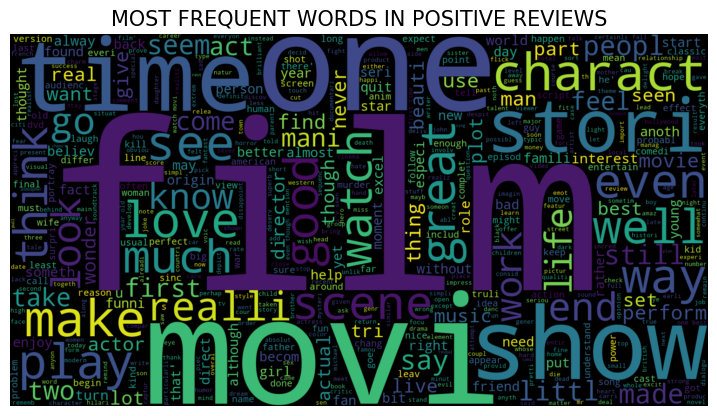

In [62]:
text = " ".join([word for word in pos_review["review"]])
plt.figure(figsize = (9,10), facecolor = "none")
wordcloud = WordCloud(max_words= 500, width = 1500, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("MOST FREQUENT WORDS IN POSITIVE REVIEWS", fontsize = 15)
plt.show()

In [63]:
x = dfdata.drop(columns =["sentiment"])
y = dfdata['sentiment']

In [64]:
x

,review,word count
0,"one review mention watch oz episod hook right,...",307
1,wonder littl product film techniqu unassuming-...,162
2,thought wonder way spend time hot summer weeke...,166
3,basic there' famili littl boy (jake) think the...,138
4,"petter mattei' ""love time money"" visual stun f...",230
...,...,...
9995,"fun, entertain movi wwii german spi (juli andr...",148
9996,"give break anyon say ""good hockey movie"" know ...",218
9997,movi bad movi watch endless seri bad horror mo...,228
9998,"movi probabl made entertain middl school, earl...",136


In [65]:
y

0       1
1       1
2       1
3       2
4       1
       ..
9995    1
9996    2
9997    2
9998    2
9999    1
Name: sentiment, Length: 9983, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
labelencoder= LabelEncoder()

In [68]:
y=labelencoder.fit_transform(y)

In [69]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

In [71]:
x_train.shape ,x_test.shape

((6988, 2), (2995, 2))

In [72]:
y_train.shape, y_test.shape

((6988,), (2995,))

In [73]:
# APPLYING COUNTEVECTORIZER (BAG OF WORDS)
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv = CountVectorizer()

In [75]:
x_train_bow = cv.fit_transform(x_train["review"]).toarray()
x_test_bow = cv.transform(x_test["review"]).toarray()

In [76]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
x_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
x_train_bow.shape

(6988, 39340)

In [79]:
x_test_bow.shape

(2995, 39340)

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [81]:
LogReg = LogisticRegression()

In [82]:
LogReg.fit(x_train_bow, y_train)

LogisticRegression()

In [83]:
y_pred = LogReg.predict(x_test_bow)  # test data means sample data

In [84]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
logReg_acc = accuracy_score(y_pred, y_test)

In [87]:
logReg_acc

0.8567612687813022

In [88]:
print("Test Accuracy: {:.2f}%".format(logReg_acc*100))

Test Accuracy: 85.68%


In [89]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1522
           1       0.85      0.86      0.86      1473

    accuracy                           0.86      2995
   macro avg       0.86      0.86      0.86      2995
weighted avg       0.86      0.86      0.86      2995



In [90]:
gnb = GaussianNB()

In [91]:
gnb.fit(x_train_bow, y_train)

GaussianNB()

In [92]:
gaussian_pred = gnb.predict(x_test_bow)

In [93]:
gaussian_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [94]:
gaussian_acc = accuracy_score(y_test, gaussian_pred)

In [95]:
gaussian_acc

0.6310517529215359

In [96]:
print("Test Accuracy: {:.2f}%".format(gaussian_acc*100))

Test Accuracy: 63.11%


In [97]:
confusion_matrix(y_test, gaussian_pred)
print(classification_report(gaussian_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.66      0.60      1230
           1       0.72      0.61      0.66      1765

    accuracy                           0.63      2995
   macro avg       0.63      0.64      0.63      2995
weighted avg       0.65      0.63      0.63      2995



In [98]:
# Applying random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier()

In [100]:
rfc.fit(x_train_bow, y_train)

RandomForestClassifier()

In [101]:
rfc_pred = rfc.predict(x_test_bow)

In [102]:
rfc_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [103]:
rfc_acc= accuracy_score(y_test, rfc_pred)

In [104]:
rfc_acc

0.8464106844741235

In [105]:
print("Test Accuracy: {:.2f}%".format(rfc_acc*100))

Test Accuracy: 84.64%


In [106]:
confusion_matrix(y_test, rfc_pred)
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1561
           1       0.83      0.86      0.84      1434

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.85      0.85      0.85      2995



# USING TF-IDF VECTORIZER

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tfidfvectorizer = TfidfVectorizer()

In [109]:
x_train_tfidf = tfidfvectorizer.fit_transform(x_train["review"]).toarray()
x_test_tfidf = tfidfvectorizer.transform(x_test["review"]).toarray()

In [110]:
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
x_test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
svc = LinearSVC()

In [113]:
svc.fit(x_train_tfidf, y_train)

LinearSVC()

In [114]:
svc_pred = svc.predict(x_test_tfidf)

In [115]:
svc_acc = accuracy_score(svc_pred, y_test) 

In [116]:
svc_acc

0.8757929883138564

In [117]:
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 87.58%


In [119]:
confusion_matrix(y_test, svc_pred)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1539
           1       0.86      0.88      0.87      1456

    accuracy                           0.88      2995
   macro avg       0.88      0.88      0.88      2995
weighted avg       0.88      0.88      0.88      2995



In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [121]:
param_grid = { "C": [0.1, 1, 10, 100], "loss" : ["hinge", "squared_hinge"]}
svc = LinearSVC()
grid = GridSearchCV(svc, param_grid, refit=True, verbose= 3)
grid.fit(x_train_bow, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.831 total time=  33.7s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.841 total time=  31.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.850 total time=  24.4s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.857 total time=  21.9s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.832 total time=  21.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.841 total time=  23.7s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.841 total time=  19.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.851 total time=  19.5s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.861 total time=  18.5s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.830 total time=  18.5s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.825 total time=  19.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [123]:
print("BEST CROSS VALIDATION SCORE : {:.2f}%".format(grid.best_score_))
print("BEST PARAMETERS : ", grid.best_params_)

BEST CROSS VALIDATION SCORE : 0.85%
BEST PARAMETERS :  {'C': 0.1, 'loss': 'squared_hinge'}
